In [1]:
import pyxdf

# Path to your XDF file
xdf_file_path = '/Users/Sophia/Documents/CurrentStudy/Baseline/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg.xdf'

# Load the XDF file
streams, fileheader = pyxdf.load_xdf(xdf_file_path)

# Iterate over each stream in the file
for i, stream in enumerate(streams):
    print(f"Stream {i+1}")
    print(f"Name: {stream['info']['name'][0]}")
    print(f"Type: {stream['info']['type'][0]}")
    print(f"Channel Count: {stream['info']['channel_count'][0]}")
    print(f"Sample Rate: {stream['info']['nominal_srate'][0]}")
    print("First few samples with timestamps:")
    for sample, timestamp in zip(stream['time_series'][:5], stream['time_stamps'][:5]):  # Adjust the number of samples to display
        print(f"Timestamp: {timestamp}, Sample: {sample}")
    print("\n")



Stream 2: Calculated effective sampling rate 3.3954 Hz is different from specified rate 2.0000 Hz.
Stream 1: Calculated effective sampling rate 3.3954 Hz is different from specified rate 2.0000 Hz.
Stream 3: Calculated effective sampling rate 3.3954 Hz is different from specified rate 2.0000 Hz.


Stream 1
Name: ThetaPower
Type: Markers
Channel Count: 1
Sample Rate: 2.000000000000000
First few samples with timestamps:
Timestamp: 256.3771504049433, Sample: [48.860622]
Timestamp: 256.6690298925044, Sample: [51.035336]
Timestamp: 256.9609093800655, Sample: [48.056213]
Timestamp: 257.2527888676266, Sample: [47.94693]
Timestamp: 257.5446683551877, Sample: [71.063614]


Stream 2
Name: BetaPower
Type: Markers
Channel Count: 1
Sample Rate: 2.000000000000000
First few samples with timestamps:
Timestamp: 256.3764535774635, Sample: [152.4888]
Timestamp: 256.668334859861, Sample: [124.4573]
Timestamp: 256.9602161422585, Sample: [94.164566]
Timestamp: 257.252097424656, Sample: [47.721294]
Timestamp: 257.5439787070535, Sample: [154.8944]


Stream 3
Name: AlphaPower
Type: Markers
Channel Count: 1
Sample Rate: 2.000000000000000
First few samples with timestamps:
Timestamp: 256.377700099072, Sample: [123.9184]
Timestamp: 256.66957844402657, Sample: [103.008575]
Timestamp: 256.9614567889811, Samp

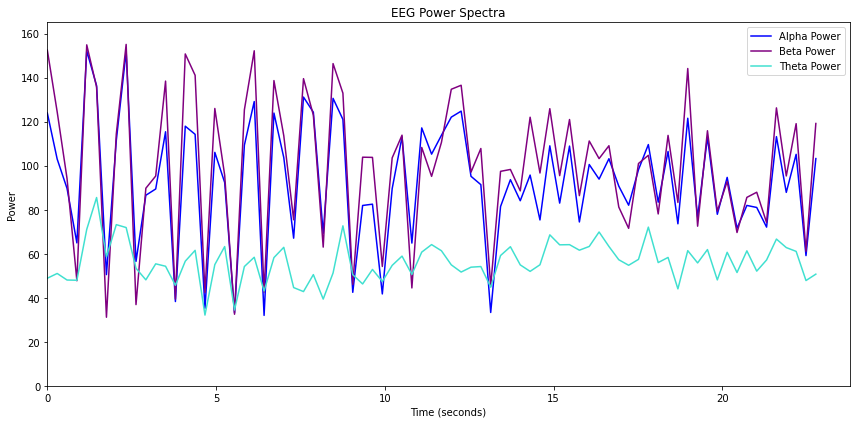

In [7]:
import matplotlib.pyplot as plt

# Extract data for Alpha, Beta, and Theta streams
alpha_stream = None
beta_stream = None
theta_stream = None

for stream in streams:
    name = stream['info']['name'][0]
    if name == 'AlphaPower':
        alpha_stream = stream
    elif name == 'BetaPower':
        beta_stream = stream
    elif name == 'ThetaPower':
        theta_stream = stream

# Check if all streams are found
if alpha_stream is None or beta_stream is None or theta_stream is None:
    print("One or more streams not found.")
    exit()

# Extract timestamps and samples
timestamps = alpha_stream['time_stamps']
alpha_samples = alpha_stream['time_series']
beta_samples = beta_stream['time_series']
theta_samples = theta_stream['time_series']

# Create a time axis using timestamps
time_axis = timestamps - timestamps[0]

# Create a single plot with multiple lines
plt.figure(figsize=(12, 6))
plt.plot(time_axis, alpha_samples, label='Alpha Power', color='blue')
plt.plot(time_axis, beta_samples, label='Beta Power', color='purple')
plt.plot(time_axis, theta_samples, label='Theta Power', color='turquoise')

plt.title('EEG Power Spectra')
plt.xlabel('Time (seconds)')
plt.ylabel('Power')
plt.legend()

# Set the limits of the x and y axes with padding
x_min = 0
x_max = max(time_axis) + 1  # Add padding to the right of the x-axis
y_max = max(max(alpha_samples), max(beta_samples), max(theta_samples)) + 10  # Add padding to the top of the y-axis

plt.xlim(x_min, x_max)
plt.ylim(0, y_max)

plt.tight_layout()
plt.show()
